In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv(r'C:\Users\siva\Desktop\irir.csv')
data.head()


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [59]:
data.dtypes

SL                                float64
SW                                float64
PL                                float64
PW                                float64
Classification_Iris-setosa          uint8
Classification_Iris-versicolor      uint8
Classification_Iris-virginica       uint8
dtype: object

In [26]:
data.mean(axis='index')

SL                                5.843333
SW                                3.054000
PL                                3.758667
PW                                1.198667
Classification_Iris-setosa        0.333333
Classification_Iris-versicolor    0.333333
Classification_Iris-virginica     0.333333
dtype: float64

In [27]:
data.isna().sum()

SL                                0
SW                                0
PL                                0
PW                                0
Classification_Iris-setosa        0
Classification_Iris-versicolor    0
Classification_Iris-virginica     0
dtype: int64

In [54]:
data = pd.get_dummies(data) #one hot encoding
data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [39]:
from sklearn.model_selection import train_test_split


In [68]:
#splitting data to feature and target

x = data.drop(['Classification_Iris-setosa','Classification_Iris-virginica'],axis=1)
y = data['Classification_Iris-virginica']

In [69]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [71]:
from sklearn.linear_model import LogisticRegression


In [72]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr = logit_model.predict(x_test)


In [73]:
#evaluating wheather the model is good or bad


from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [74]:
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('Precision = ',precision_score(y_test,y_pred_lr))
print('Recall= ',recall_score(y_test,y_pred_lr))
print('f1 score = ',f1_score(y_test,y_pred_lr))
      

Accuracy =  1.0
Precision =  1.0
Recall=  1.0
f1 score =  1.0


In [75]:
confusion_matrix(y_test,y_pred_lr)

array([[26,  0],
       [ 0, 12]], dtype=int64)

In [76]:
y_pred_lr

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [77]:
y_test

73     0
18     0
118    1
78     0
76     0
31     0
64     0
141    1
68     0
82     0
110    1
12     0
36     0
9      0
19     0
56     0
104    1
69     0
55     0
132    1
29     0
127    1
26     0
128    1
131    1
145    1
108    1
143    1
45     0
30     0
22     0
15     0
65     0
11     0
42     0
146    1
51     0
27     0
Name: Classification_Iris-virginica, dtype: uint8

# k-Nearest Neighbour

In [82]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(5,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski' ,p = 2)
    classifier.fit(x_train,y_train)
    y_pred_knn =  classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)


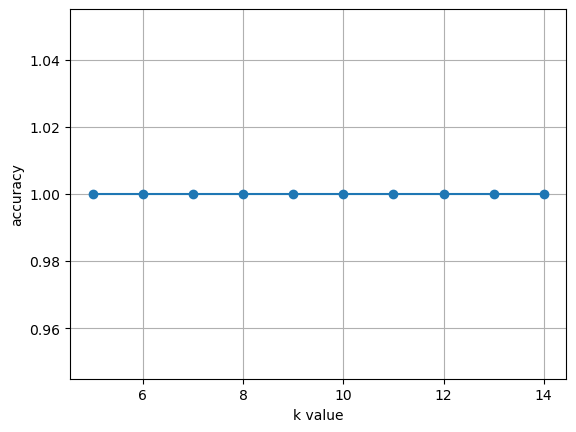

In [83]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [88]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski' ,p = 2)
classifier.fit(x_train,y_train)

y_pred_knn =  classifier.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [90]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_knn))
print('Recall= ',recall_score(y_test,y_pred_knn))
print('f1 score = ',f1_score(y_test,y_pred_knn))
      

Accuracy =  1.0
Precision =  1.0
Recall=  1.0
f1 score =  1.0


In [87]:
confusion_matrix(y_test,y_pred_knn)


array([[26,  0],
       [ 0, 12]], dtype=int64)